In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

file = '/kaggle/input/nypd-complaint/NYPD_Complaint_Data_Historic_20240601.csv'

df = pd.read_csv(file)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107.0,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F
1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109.0,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0.0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F
2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106.0,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341.0,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M
4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105.0,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,(null),(null),(null),999602.0,176145.0,<18,BLACK,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M


## Analiza danych

In [2]:
df.describe(include='all')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
count,1504231.0,1504032,1504227,1062034,1504227,1.504090e+06,1504227,1.504227e+06,1504227,1.502721e+06,1504227,1504227,1504227,1504227,1504116,1504227,1504226,1.504226e+06,1504226,1504226,1504226,1.504225e+06,1.504225e+06,1504226,1504226,1504226,32266.000000,1.504225e+06,1.504225e+06,1504225,1504226,1504226,1504226,1504226,1504226
unique,1504231.0,3712,1442,2613,1441,NaN,1830,NaN,65,NaN,365,2,3,6,6,82,18,NaN,8,28,628,NaN,NaN,31,8,4,NaN,NaN,NaN,90817,9,368,54,8,6
top,39468181.0,01/01/2010,12:00:00,01/15/2010,(null),NaN,05/13/2009,NaN,PETIT LARCENY,NaN,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STREET,N.Y. POLICE DEPT,NaN,(null),(null),(null),NaN,NaN,(null),(null),(null),NaN,NaN,NaN,"(40.750423, -73.98928)",PATROL BORO BRONX,(null),(null),UNKNOWN,F
freq,1.0,2097,40270,1206,441627,NaN,1713,NaN,237070,NaN,129438,1479322,883121,437999,724578,523089,1337594,NaN,1504218,1499044,1385985,NaN,NaN,1150345,911973,950107,NaN,NaN,NaN,6117,341123,1471960,511833,533279,577097
mean,NaN,NaN,NaN,NaN,NaN,6.354722e+01,NaN,2.942020e+02,NaN,4.223706e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000408e-01,NaN,NaN,NaN,1.005122e+06,2.074300e+05,NaN,NaN,NaN,13.900886,4.073587e+01,-7.392445e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.437983e+01,NaN,1.460136e+02,NaN,2.185676e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.889824e+00,NaN,NaN,NaN,2.168601e+04,3.065820e+04,NaN,NaN,NaN,12.624055,1.072077e-01,1.435738e-01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,1.010000e+02,NaN,1.010000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1.000000,0.000000e+00,-7.425474e+01,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000e+01,NaN,1.170000e+02,NaN,2.540000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,9.921900e+05,1.845130e+05,NaN,NaN,NaN,3.000000,4.067304e+01,-7.397137e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.300000e+01,NaN,3.410000e+02,NaN,3.970000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.005226e+06,2.062330e+05,NaN,NaN,NaN,11.000000,4.073268e+01,-7.392429e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,9.400000e+01,NaN,3.510000e+02,NaN,6.370000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.017119e+06,2.360990e+05,NaN,NaN,NaN,30.000000,4.081467e+01,-7.388143e+01,NaN,NaN,NaN,NaN,NaN,NaN


Dodanie kolumny czas trwania

In [3]:
def clean_time(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) >= 2:
            return parts[0] + ':' + parts[1]
        return time_str
    except AttributeError:
        return None

df['CMPLNT_FR_TM'] = df['CMPLNT_FR_TM'].apply(clean_time)
df['CMPLNT_TO_TM'] = df['CMPLNT_TO_TM'].apply(clean_time)

df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M', errors='coerce')
df['CMPLNT_TO_TM'] = pd.to_datetime(df['CMPLNT_TO_TM'], format='%H:%M', errors='coerce')

df['TIME'] = (df['CMPLNT_TO_TM'] - df['CMPLNT_FR_TM']).dt.total_seconds() / 60

df['TIME'] = df['TIME'].apply(lambda x: int(x) if pd.notnull(x) and x >= 0 else 0)

In [4]:
df.describe(include='all')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,TIME
count,1504231.0,1504032,1504198,1062034,1062600,1.504090e+06,1504227,1.504227e+06,1504227,1.502721e+06,1504227,1504227,1504227,1504227,1504116,1504227,1504226,1.504226e+06,1504226,1504226,1504226,1.504225e+06,1.504225e+06,1504226,1504226,1504226,32266.000000,1.504225e+06,1.504225e+06,1504225,1504226,1504226,1504226,1504226,1504226,1.504231e+06
unique,1504231.0,3712,NaN,2613,NaN,NaN,1830,NaN,65,NaN,365,2,3,6,6,82,18,NaN,8,28,628,NaN,NaN,31,8,4,NaN,NaN,NaN,90817,9,368,54,8,6,NaN
top,39468181.0,01/01/2010,NaN,01/15/2010,NaN,NaN,05/13/2009,NaN,PETIT LARCENY,NaN,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STREET,N.Y. POLICE DEPT,NaN,(null),(null),(null),NaN,NaN,(null),(null),(null),NaN,NaN,NaN,"(40.750423, -73.98928)",PATROL BORO BRONX,(null),(null),UNKNOWN,F,NaN
freq,1.0,2097,NaN,1206,NaN,NaN,1713,NaN,237070,NaN,129438,1479322,883121,437999,724578,523089,1337594,NaN,1504218,1499044,1385985,NaN,NaN,1150345,911973,950107,NaN,NaN,NaN,6117,341123,1471960,511833,533279,577097,NaN
mean,NaN,NaN,1900-01-01 13:39:03.944641536,NaN,1900-01-01 13:27:04.106041344,6.354722e+01,NaN,2.942020e+02,NaN,4.223706e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000408e-01,NaN,NaN,NaN,1.005122e+06,2.074300e+05,NaN,NaN,NaN,13.900886,4.073587e+01,-7.392445e+01,NaN,NaN,NaN,NaN,NaN,NaN,5.475400e+01
min,NaN,NaN,1900-01-01 00:00:00,NaN,1900-01-01 00:00:00,1.000000e+00,NaN,1.010000e+02,NaN,1.010000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1.000000,0.000000e+00,-7.425474e+01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,1900-01-01 09:00:00,NaN,1900-01-01 08:50:00,4.000000e+01,NaN,1.170000e+02,NaN,2.540000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,9.921900e+05,1.845130e+05,NaN,NaN,NaN,3.000000,4.067304e+01,-7.397137e+01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,1900-01-01 14:55:00,NaN,1900-01-01 14:20:00,6.300000e+01,NaN,3.410000e+02,NaN,3.970000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.005226e+06,2.062330e+05,NaN,NaN,NaN,11.000000,4.073268e+01,-7.392429e+01,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00
75%,NaN,NaN,1900-01-01 19:00:00,NaN,1900-01-01 18:45:00,9.400000e+01,NaN,3.510000e+02,NaN,6.370000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.017119e+06,2.360990e+05,NaN,NaN,NaN,30.000000,4.081467e+01,-7.388143e+01,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+01
max,NaN,NaN,1900-01-01 23:59:00,NaN,1900-01-01 23:59:00,1.230000e+02,NaN,8.810000e+02,NaN,9.690000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.700000e+01,NaN,NaN,NaN,1.067306e+06,2.718190e+05,NaN,NaN,NaN,34.000000,4.091271e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.439000e+03


Lista kolumn do usunięcia:

CMPLNT_NUM: Nie ma potrzeby przechowywania losowo generowanego identyfikatora dla każdej danej.

CMPLNT_FR_TM, CMPLNT_TO_DT, CMPLNT_TO_TM: Zamiast tych kolumn, zamieńmy je na dwie kolumny: godzina i czas trwania.

RPT_DT: Data zgłoszenia na policję nie jest istotna.

PD_DESC: Nie ma potrzeby przechowywania szczegółowego numeru sprawy.

BORO_NM: Przechowujemy dzielnicę.

PREM_TYP_DESC: Zbyt podobne do LOC_OF_OCCUR_DESC.

JURIS_DESC: Przechowujemy dzielnicę.

JURISDICTION_CODE: Nie interesuje nas, na terenie której jednostki wystąpił incydent.

PARKS_NM: Przechowujemy dzielnicę, nazwa parku to niepotrzebny szczegół, szczególnie że wiele danych nie jest uzupełnionych.

HADEVELOPT: Podobnie jak w przypadku parków.

X_COORD_CD, Y_COORD_CD: Zbyt szczegółowa lokalizacja.

Latitude, Longitude, Lat_Lon: Zbyt szczegółowa lokalizacja.

STATION_NAME: Podobnie jak w przypadku parków.

In [5]:
toRemove = [
    'CMPLNT_NUM',
    'CMPLNT_FR_DT',
    'CMPLNT_TO_DT',
    'CMPLNT_TO_TM',
    'RPT_DT',
    'PD_DESC',
    'BORO_NM',
    'PREM_TYP_DESC',
    'JURIS_DESC',
    'JURISDICTION_CODE',
    'PARKS_NM',
    'HADEVELOPT',
    'X_COORD_CD',
    'Y_COORD_CD',
    'Latitude',
    'Longitude',
    'Lat_Lon',
    'STATION_NAME',
    'TRANSIT_DISTRICT',
    'PATROL_BORO',
    'HOUSING_PSA'
]


Skrypt usuwający kolumny

In [6]:
for columnName in toRemove:
    if columnName in df.columns:
        print("Column " + columnName + " exists and will be removed.")
        df.drop(columns=[columnName], inplace=True)
    else:
        print("Column " + columnName + " does not exist.")

Column CMPLNT_NUM exists and will be removed.
Column CMPLNT_FR_DT exists and will be removed.
Column CMPLNT_TO_DT exists and will be removed.
Column CMPLNT_TO_TM exists and will be removed.
Column RPT_DT exists and will be removed.
Column PD_DESC exists and will be removed.
Column BORO_NM exists and will be removed.
Column PREM_TYP_DESC exists and will be removed.
Column JURIS_DESC exists and will be removed.
Column JURISDICTION_CODE exists and will be removed.
Column PARKS_NM exists and will be removed.
Column HADEVELOPT exists and will be removed.
Column X_COORD_CD exists and will be removed.
Column Y_COORD_CD exists and will be removed.
Column Latitude exists and will be removed.
Column Longitude exists and will be removed.
Column Lat_Lon exists and will be removed.
Column STATION_NAME exists and will be removed.
Column TRANSIT_DISTRICT exists and will be removed.
Column PATROL_BORO exists and will be removed.
Column HOUSING_PSA exists and will be removed.


In [7]:
df.dtypes

CMPLNT_FR_TM         datetime64[ns]
ADDR_PCT_CD                 float64
KY_CD                       float64
OFNS_DESC                    object
PD_CD                       float64
CRM_ATPT_CPTD_CD             object
LAW_CAT_CD                   object
LOC_OF_OCCUR_DESC            object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
VIC_AGE_GROUP                object
VIC_RACE                     object
VIC_SEX                      object
TIME                          int64
dtype: object

In [8]:
print(df.isnull().sum())

CMPLNT_FR_TM           33
ADDR_PCT_CD           141
KY_CD                   4
OFNS_DESC               4
PD_CD                1510
CRM_ATPT_CPTD_CD        4
LAW_CAT_CD              4
LOC_OF_OCCUR_DESC     115
SUSP_AGE_GROUP          5
SUSP_RACE               5
SUSP_SEX                5
VIC_AGE_GROUP           5
VIC_RACE                5
VIC_SEX                 5
TIME                    0
dtype: int64


Dane mogą być wykorzystane do klasyfikacji dystryktu, okolicy zdarzenia, albo rodzaju przestępstwa. Informacje zawarte we współrzędnych mogą zostać zwizualizowane na mapie, a daty mogą posłużyć jako wykresy zgrupowane dla zobrazowania np. popełnianych przestępstw w zależności od płci, wieku, rasy itp. Możliwe że te dane są w jakiś sposób powiązane z danymi ofiar. Rodzaje przestępstw i ich ilość mogą być powiązane z godziną zgłoszenia. Należy przedstawić korelacje pomiędzy danymi.

## Czyszczenie danych

In [9]:
len(df)

1504231

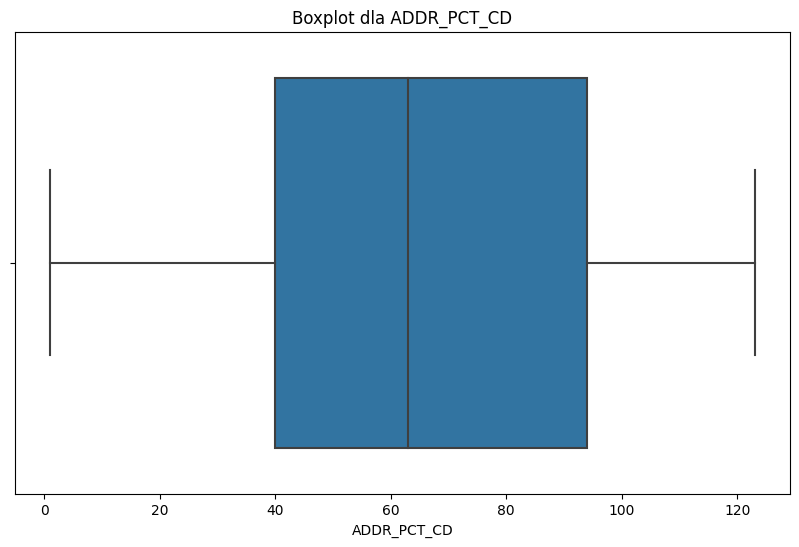

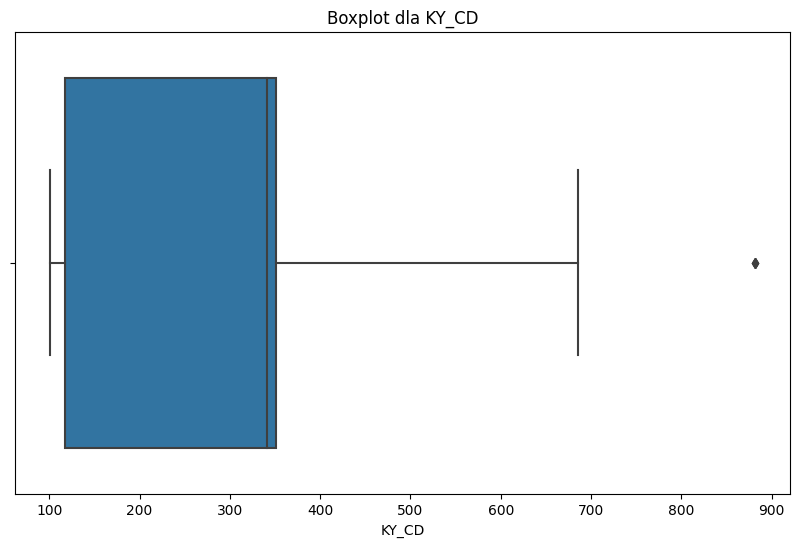

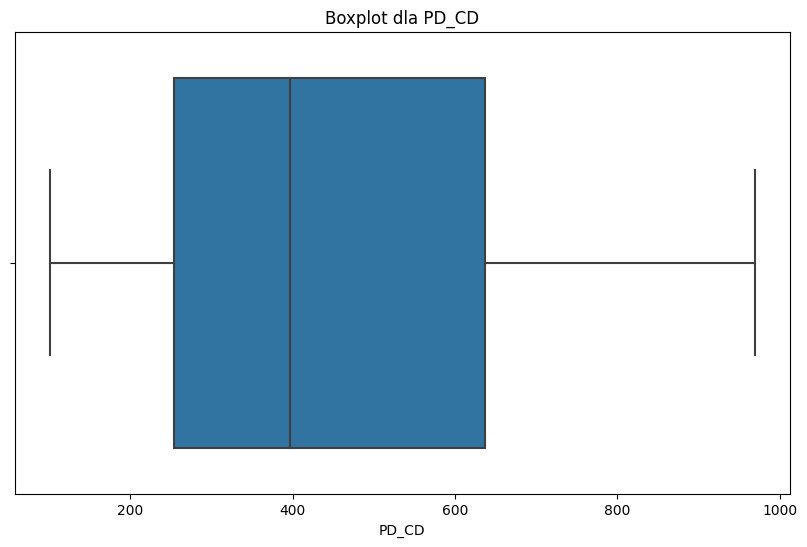

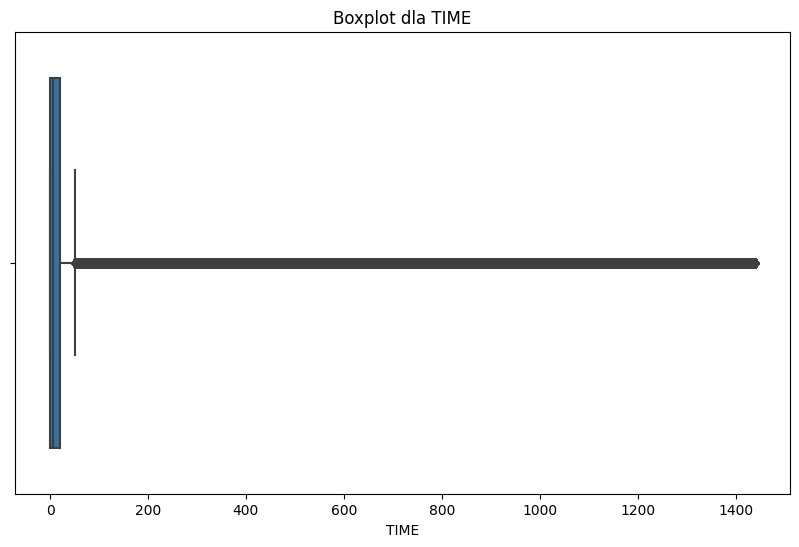

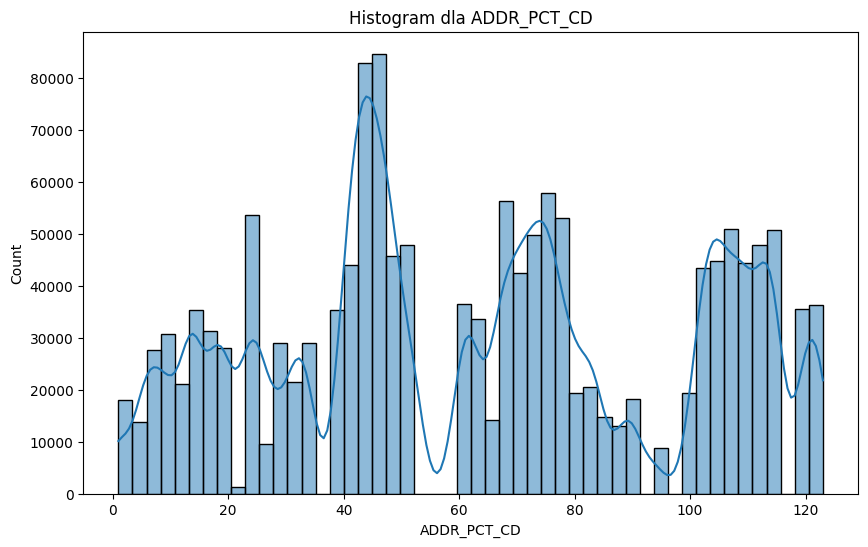

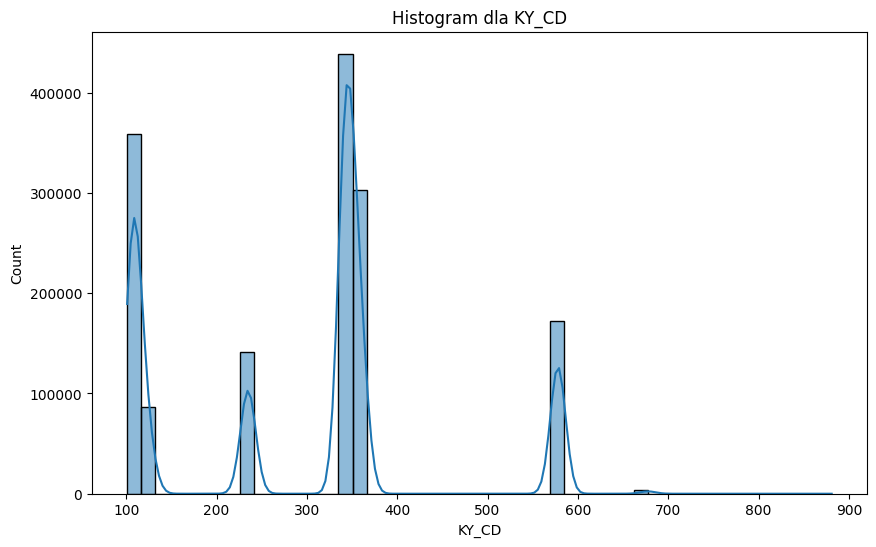

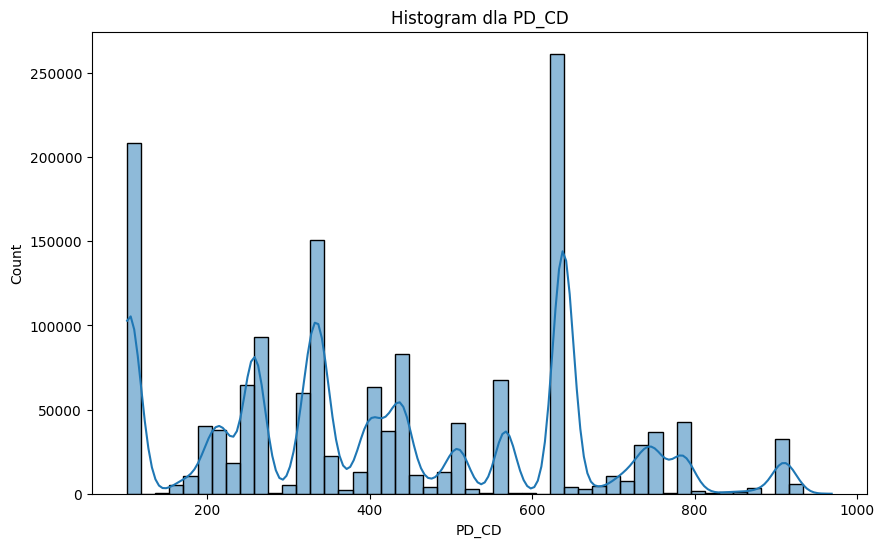

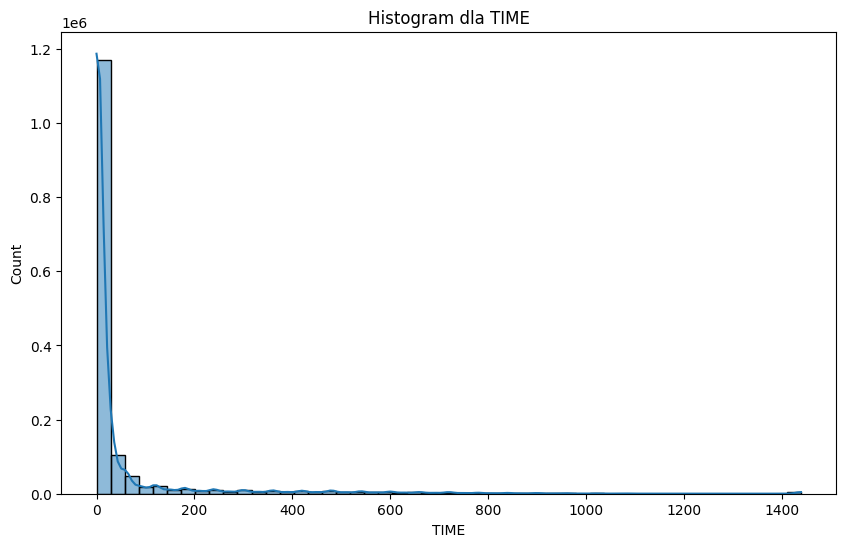

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wizualizacje wartości odstających
def plot_boxplots(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot dla {column}')
        plt.show()

def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], bins=50, kde=True)
        plt.title(f'Histogram dla {column}')
        plt.show()

numerical_columns = df.select_dtypes(include=['number']).columns

plot_boxplots(df, numerical_columns)
plot_histograms(df, numerical_columns)

In [11]:
# Zamiana wartości '(null)' na rzeczywisty NaN we wszystkich kolumnach
df.replace('(null)', pd.NA, inplace=True)

Naprawa błędów w grupach wiekowych. Zamiana na odpowiednie kategorie.

In [12]:
# Zamiana 'UNKNOWN' na None
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].replace('UNKNOWN', None)
df['SUSP_AGE_GROUP'] = df['SUSP_AGE_GROUP'].replace('UNKNOWN', None)
df['VIC_RACE'] = df['VIC_RACE'].replace('UNKNOWN', None)

print("Unikalne wartości przed transformacją VIC_AGE_GROUP:")
print(df['VIC_AGE_GROUP'].unique())

def transform_age_group(value):
    if pd.isna(value):
        return pd.NA
    value = str(value).strip()  
    if value == '<18':
        return '0-18'
    elif value == '65+':
        return '65+'
    elif value in ['18-24', '25-44', '45-64']:
        return value
    else:
        return pd.NA

transformed_values = df['VIC_AGE_GROUP'].apply(transform_age_group)
df['VIC_AGE_GROUP'] = transformed_values
transformed_values = df['SUSP_AGE_GROUP'].apply(transform_age_group)
df['SUSP_AGE_GROUP'] = transformed_values

Unikalne wartości przed transformacją VIC_AGE_GROUP:
['25-44' '45-64' <NA> '18-24' '<18' None '65+' '946' '933' '960' '942'
 '955' '931' '926' '937' '922' '961' '938' '947' '956' '916' '912' '928'
 '957' '929' '935' '913' '951' '934' '948' '921' '925' '941' '981' '944'
 '939' '959' '940' '930' '954' '952' '999' '943' '964' '915' '971' '924'
 '945' '932' '970' '936' '927' '949' '923' nan]


Wypełnianie wartości brakujących typu obiekt modą, a numerycznych - medianą.

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

## Wizualizacja

Tworzenie wizualizacji w matplotlib.

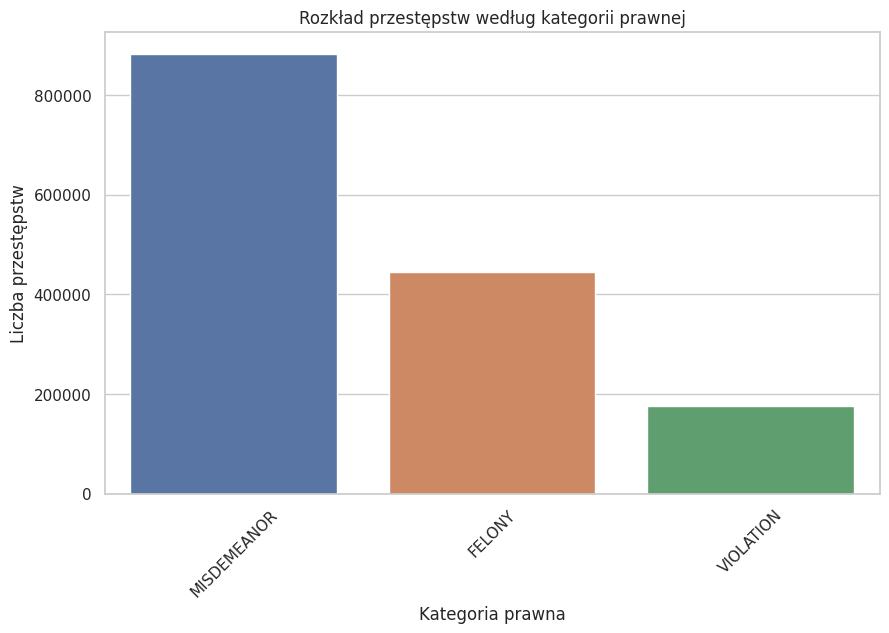

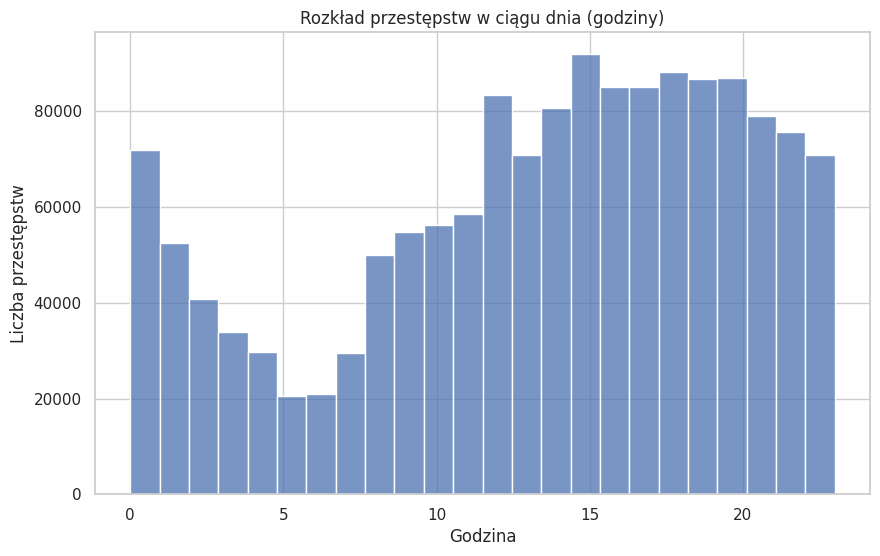

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Wizualizacja 1: Rozkład przestępstw według kategorii prawnej
law_cat_sum = df['LAW_CAT_CD'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=law_cat_sum['LAW_CAT_CD'], y=law_cat_sum['count'])
plt.title('Rozkład przestępstw według kategorii prawnej')
plt.xlabel('Kategoria prawna')
plt.ylabel('Liczba przestępstw')
plt.xticks(rotation=45)
plt.show()

# Wizualizacja 2: Rozkład przestępstw w ciągu dnia (godziny)
plt.figure(figsize=(10, 6))
sns.histplot(pd.to_datetime(df['CMPLNT_FR_TM']).dt.hour, bins=24, kde=False)
plt.title('Rozkład przestępstw w ciągu dnia (godziny)')
plt.xlabel('Godzina')
plt.ylabel('Liczba przestępstw')
plt.show()

Text(0.5, 1.0, 'Liczba przestępstw według wieku sprawców')

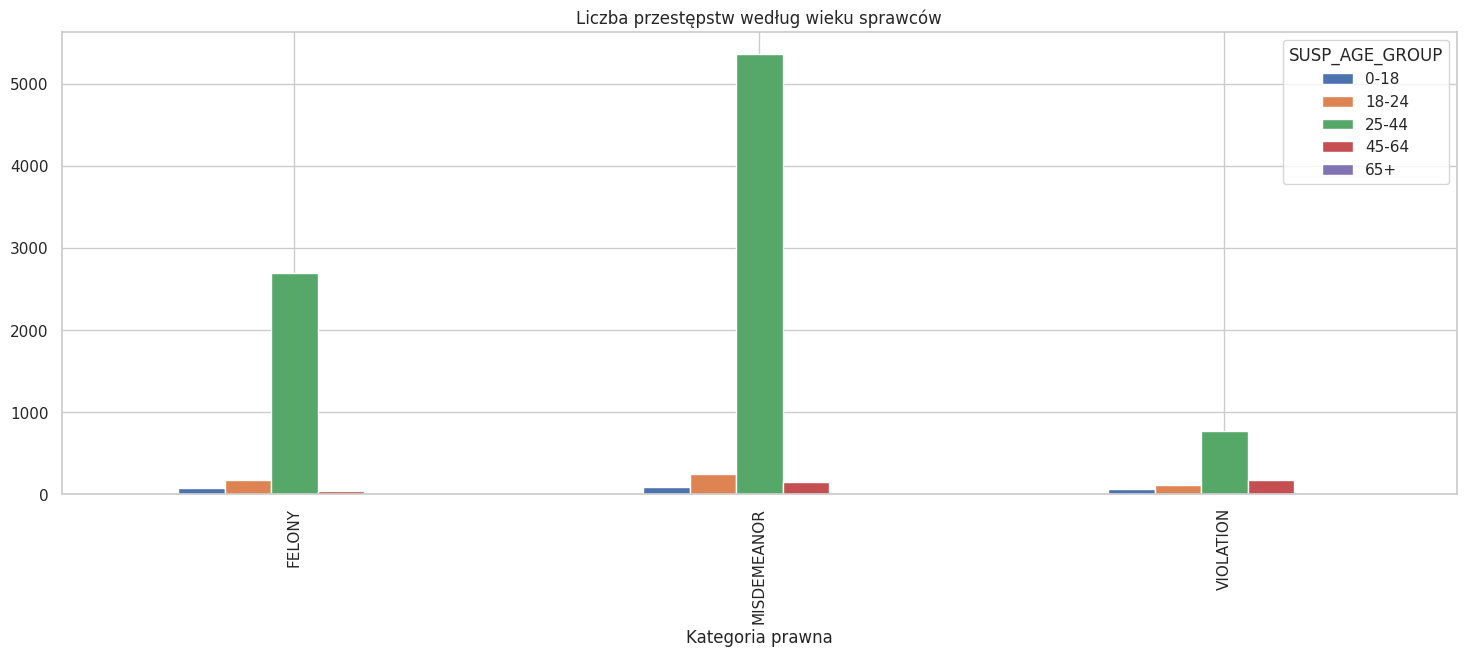

In [15]:
df1 = df.sample(n = 10000)

df1.groupby(['LAW_CAT_CD'])['SUSP_AGE_GROUP'].value_counts().unstack().plot.bar(figsize=(18, 6))
plt.xlabel('Kategoria prawna')
plt.title('Liczba przestępstw według wieku sprawców')

Próbkowanie danych, ponieważ przy klasyfikacji trzech kategorii nie przyda się ponad milion wierszy. Jednocześnie ustawiamy równą liczbę wierszy dla każdej kategorii prawnej.

In [16]:
df1 = df.loc[df['LAW_CAT_CD'] == 'MISDEMEANOR']
df2 = df.loc[df['LAW_CAT_CD'] == 'FELONY']
df3 = df.loc[df['LAW_CAT_CD'] == 'VIOLATION']
df1 = df1.sample(n = 5000)
df2 = df2.sample(n = 5000)
df3 = df3.sample(n = 5000)
df = pd.concat([df1, df2, df3])
df = df.reset_index(drop=True)

In [17]:
# Sprawdzenie czy są jeszcze jakieś brakujące dane
print(df.isnull().sum())

CMPLNT_FR_TM         0
ADDR_PCT_CD          0
KY_CD                0
OFNS_DESC            0
PD_CD                0
CRM_ATPT_CPTD_CD     0
LAW_CAT_CD           0
LOC_OF_OCCUR_DESC    0
SUSP_AGE_GROUP       0
SUSP_RACE            0
SUSP_SEX             0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
TIME                 0
dtype: int64


Tworzenie kolumn "dummy" oraz skalowanie danych za pomocą MinMaxScaler - metody, która pozwala na skalowanie bez znaczenia jak rozkład danych będzie się różnił od przeskalowanego zbioru.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False, dtype=int)

# Standaryzacja kolumn numerycznych
# Wykluczanie kolumn kategorycznych liczbowych
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.difference(['ADDR_PCT_CD', 'KY_CD', 'PD_CD'])

# Użycie MinMaxScaler dla kolumn numerycznych
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [19]:
# Sprawdzenie czy są jeszcze jakieś brakujące dane
print(df.isnull().sum())

CMPLNT_FR_TM               0
ADDR_PCT_CD                0
KY_CD                      0
PD_CD                      0
TIME                       0
                          ..
VIC_RACE_WHITE HISPANIC    0
VIC_SEX_D                  0
VIC_SEX_E                  0
VIC_SEX_F                  0
VIC_SEX_M                  0
Length: 93, dtype: int64


In [20]:
df.head()

,CMPLNT_FR_TM,ADDR_PCT_CD,KY_CD,PD_CD,TIME,OFNS_DESC_ADMINISTRATIVE CODE,OFNS_DESC_ALCOHOLIC BEVERAGE CONTROL LAW,OFNS_DESC_ARSON,OFNS_DESC_ASSAULT 3 & RELATED OFFENSES,OFNS_DESC_BURGLAR'S TOOLS,OFNS_DESC_BURGLARY,OFNS_DESC_CHILD ABANDONMENT/NON SUPPORT,OFNS_DESC_CRIMINAL MISCHIEF & RELATED OF,OFNS_DESC_CRIMINAL TRESPASS,OFNS_DESC_DANGEROUS DRUGS,OFNS_DESC_DANGEROUS WEAPONS,OFNS_DESC_DISORDERLY CONDUCT,OFNS_DESC_ENDAN WELFARE INCOMP,OFNS_DESC_FELONY ASSAULT,OFNS_DESC_FORGERY,OFNS_DESC_FRAUDS,OFNS_DESC_FRAUDULENT ACCOSTING,OFNS_DESC_GAMBLING,OFNS_DESC_GRAND LARCENY,OFNS_DESC_GRAND LARCENY OF MOTOR VEHICLE,OFNS_DESC_HARRASSMENT 2,OFNS_DESC_INTOXICATED & IMPAIRED DRIVING,OFNS_DESC_INTOXICATED/IMPAIRED DRIVING,OFNS_DESC_KIDNAPPING & RELATED OFFENSES,OFNS_DESC_LOITERING/DEVIATE SEX,OFNS_DESC_MISCELLANEOUS PENAL LAW,OFNS_DESC_MURDER & NON-NEGL. MANSLAUGHTER,OFNS_DESC_NYS LAWS-UNCLASSIFIED FELONY,OFNS_DESC_OFF. AGNST PUB ORD SENSBLTY &,OFNS_DESC_OFFENSES AGAINST PUBLIC ADMINI,OFNS_DESC_OFFENSES AGAINST PUBLIC SAFETY,OFNS_DESC_OFFENSES AGAINST THE PERSON,OFNS_DESC_OFFENSES INVOLVING FRAUD,OFNS_DESC_OFFENSES RELATED TO CHILDREN,OFNS_DESC_OTHER OFFENSES RELATED TO THEF,OFNS_DESC_OTHER STATE LAWS,OFNS_DESC_OTHER STATE LAWS (NON PENAL LA,OFNS_DESC_PETIT LARCENY,OFNS_DESC_PETIT LARCENY OF MOTOR VEHICLE,OFNS_DESC_POSSESSION OF STOLEN PROPERTY,OFNS_DESC_RAPE,OFNS_DESC_ROBBERY,OFNS_DESC_SEX CRIMES,OFNS_DESC_THEFT OF SERVICES,OFNS_DESC_THEFT-FRAUD,OFNS_DESC_UNAUTHORIZED USE OF A VEHICLE,OFNS_DESC_UNLAWFUL POSS. WEAP. ON SCHOOL,OFNS_DESC_VEHICLE AND TRAFFIC LAWS,CRM_ATPT_CPTD_CD_ATTEMPTED,CRM_ATPT_CPTD_CD_COMPLETED,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,LOC_OF_OCCUR_DESC_FRONT OF,LOC_OF_OCCUR_DESC_INSIDE,LOC_OF_OCCUR_DESC_OPPOSITE OF,LOC_OF_OCCUR_DESC_OUTSIDE,LOC_OF_OCCUR_DESC_REAR OF,SUSP_AGE_GROUP_0-18,SUSP_AGE_GROUP_18-24,SUSP_AGE_GROUP_25-44,SUSP_AGE_GROUP_45-64,SUSP_AGE_GROUP_65+,SUSP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,SUSP_RACE_ASIAN / PACIFIC ISLANDER,SUSP_RACE_BLACK,SUSP_RACE_BLACK HISPANIC,SUSP_RACE_UNKNOWN,SUSP_RACE_WHITE,SUSP_RACE_WHITE HISPANIC,SUSP_SEX_F,SUSP_SEX_M,SUSP_SEX_U,VIC_AGE_GROUP_0-18,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_D,VIC_SEX_E,VIC_SEX_F,VIC_SEX_M
0,1900-01-01 18:00:00,43.0,344.0,101.0,0.020848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1900-01-01 06:10:00,111.0,351.0,254.0,0.017373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1900-01-01 09:00:00,88.0,341.0,305.0,0.006949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1900-01-01 12:00:00,76.0,341.0,321.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

## Modelowanie

Sprawdzenie korelacji dla różnych kategorii. Jak widać, dla ostatniego przypadku "Violation" korelacje z niektórymi zmiennymi potrafią być bardzo wysokie. Model powinien poradzić sobie z tak znaczącymi parametrami.

In [21]:
df.corr(numeric_only=True)['LAW_CAT_CD_FELONY'].sort_values(ascending=False)

LAW_CAT_CD_FELONY           1.000000
OFNS_DESC_GRAND LARCENY     0.437654
OFNS_DESC_BURGLARY          0.299774
OFNS_DESC_ROBBERY           0.298557
OFNS_DESC_FELONY ASSAULT    0.279016
                              ...   
PD_CD                      -0.304519
OFNS_DESC_HARRASSMENT 2    -0.490952
LAW_CAT_CD_MISDEMEANOR     -0.500000
LAW_CAT_CD_VIOLATION       -0.500000
KY_CD                      -0.838804
Name: LAW_CAT_CD_FELONY, Length: 92, dtype: float64

In [22]:
df.corr(numeric_only=True)['LAW_CAT_CD_MISDEMEANOR'].sort_values(ascending=False)

LAW_CAT_CD_MISDEMEANOR                      1.000000
OFNS_DESC_PETIT LARCENY                     0.448901
OFNS_DESC_ASSAULT 3 & RELATED OFFENSES      0.354117
OFNS_DESC_OFF. AGNST PUB ORD SENSBLTY &     0.256576
OFNS_DESC_CRIMINAL MISCHIEF & RELATED OF    0.248327
                                              ...   
OFNS_DESC_GRAND LARCENY                    -0.218827
PD_CD                                      -0.252526
OFNS_DESC_HARRASSMENT 2                    -0.490952
LAW_CAT_CD_FELONY                          -0.500000
LAW_CAT_CD_VIOLATION                       -0.500000
Name: LAW_CAT_CD_MISDEMEANOR, Length: 92, dtype: float64

In [23]:
df.corr(numeric_only=True)['LAW_CAT_CD_VIOLATION'].sort_values(ascending=False)

LAW_CAT_CD_VIOLATION       1.000000
OFNS_DESC_HARRASSMENT 2    0.981903
KY_CD                      0.876606
PD_CD                      0.557044
SUSP_SEX_F                 0.332614
                             ...   
SUSP_SEX_M                -0.271399
SUSP_AGE_GROUP_25-44      -0.312598
SUSP_RACE_BLACK           -0.354334
LAW_CAT_CD_FELONY         -0.500000
LAW_CAT_CD_MISDEMEANOR    -0.500000
Name: LAW_CAT_CD_VIOLATION, Length: 92, dtype: float64

In [24]:
df = df.drop(columns='CMPLNT_FR_TM')

Podzielenie zbioru na dane treningowe i testowe.

In [25]:
from sklearn.model_selection import train_test_split

y = df[['LAW_CAT_CD_FELONY', 'LAW_CAT_CD_MISDEMEANOR', 'LAW_CAT_CD_VIOLATION']]
X = df.drop(columns=['LAW_CAT_CD_FELONY', 'LAW_CAT_CD_MISDEMEANOR', 'LAW_CAT_CD_VIOLATION'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

Utworzenie modelu dla algorytmu k-NN przy różnych wersjach n.

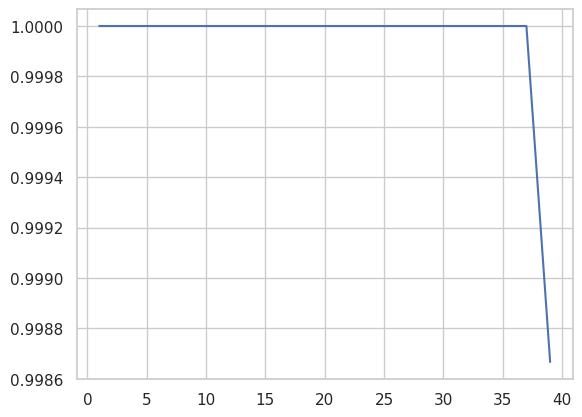

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier

accuracies=[]

ks = range(1, 41, 2)
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    accuracies.append(model.score(X_test, y_test))
    
fig, ax = plt.subplots(1, 1)
plt.plot(ks, accuracies)

Przedstawienie miar Precision, Recall, F1-score dla trzech kategorii na zbiorze testowym.

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(classification_report(y_pred_test, y_test, target_names=['FELONY','MISDEMEANOR', 'VIOLATION']))

              precision    recall  f1-score   support

      FELONY       1.00      1.00      1.00       992
 MISDEMEANOR       1.00      1.00      1.00       968
   VIOLATION       1.00      1.00      1.00      1040

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000
 samples avg       1.00      1.00      1.00      3000



Przedstawienie wyniku dokładności na zbiorze testowym.

In [28]:
accuracy_score(y_pred_test, y_test)

1.0

In [29]:
def plot_confusionmatrix(y_pred,y_true,data):
    print(f'Confusion matrix for {data} data')
    cf = confusion_matrix(y_pred.argmax(axis=1), y_true.values.argmax(axis=1))
    sns.heatmap(cf,annot=True, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Wyświetlenie macierzy omyłek na zbiorze treningowym i testowym.

Confusion matrix for Train data


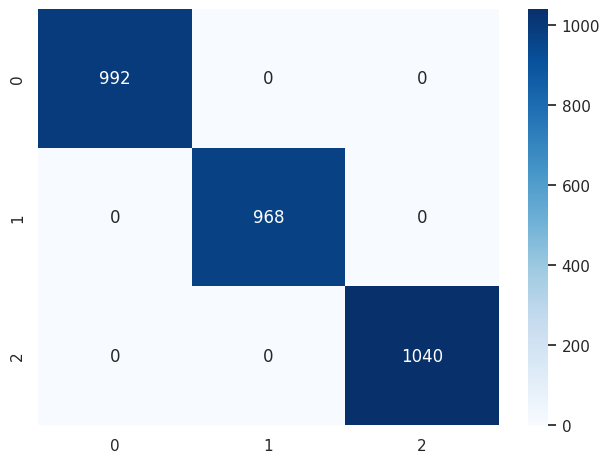

Confusion matrix for Test data


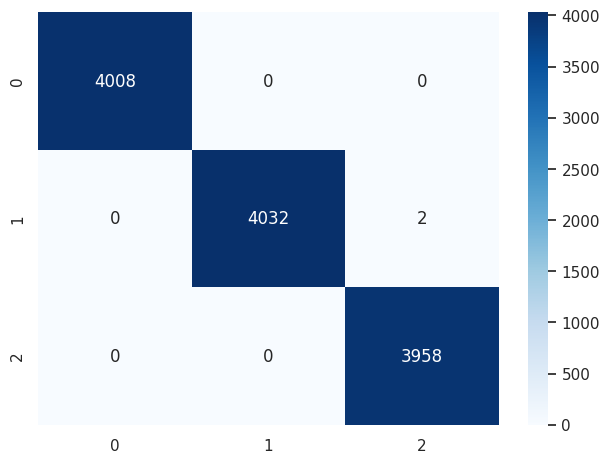

In [30]:
plot_confusionmatrix(y_pred_test, y_test, 'Train')
plot_confusionmatrix(y_pred_train, y_train, 'Test')